In [1]:
#basics
import numpy as np
import pandas as pd
from math import sqrt

#viz
import seaborn as sns
import matplotlib.pyplot as plt

#stats and modeling
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

#modules
from wrangle import wrangle_zillow, scale_zillow
import utils

#### Acquire data (#1)

In [2]:
tr, te, val = wrangle_zillow(val_ratio=.15,test_ratio=.15)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
tr.shape

(1470497, 8)

#### FIt linear regression model (#2)

In [4]:
#get scaled dataframes - use standard scaler
tr_sc, te_sc, val_sc = scale_zillow(tr, te, val, kind='standard')

In [5]:
tr_sc.head(2)

,value,county,bed,bath,sf,yearbuilt,Orange_CA,Ventura_CA
1528912,680217.0,Ventura_CA,1.891112,0.901298,1.300677,2.069924,0,1
158505,269461.0,Orange_CA,-0.308378,-0.213532,-0.608716,-0.441526,1,0


In [6]:
df = pd.DataFrame()
df_sc = pd.DataFrame()
#Get independent and dependent variables
df['x'] = tr[['sf']]
df['y'] = tr[['value']]
df['x_sc'] = tr_sc[['sf']]

In [7]:
#Generate and fit model
model = LinearRegression().fit(df[['x']],df[['y']])
model_sc = LinearRegression().fit(df[['x_sc']],df[['y']])
#Get predictions
df['yhat'] = model.predict(df[['x']])
df['yhat_sc'] = model_sc.predict(df[['x_sc']])
#Get baseline
df['yhat_baseline'] = df['y'].mean()

####  Plot the residuals for the linear regression model (#3)

In [8]:
#get residuals
df['res'] = df['y'] - df['yhat']
df['res_sc'] = df['y'] - df['yhat_sc']
df['res_baseline'] =  df['y'] - df['yhat_baseline']

In [9]:
df.head(2)

,x,y,x_sc,yhat,yhat_sc,yhat_baseline,res,res_sc,res_baseline
1528912,2851.0,680217.0,1.300677,644083.059481,644083.059481,400360.730018,36133.940519,36133.940519,279856.269982
158505,1316.0,269461.0,-0.608716,286298.832265,286298.832265,400360.730018,-16837.832265,-16837.832265,-130899.730018


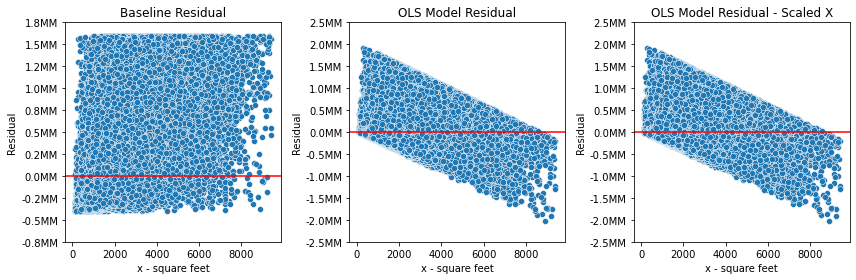

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
ax = sns.scatterplot(data = df, x='x', y='res_baseline')
utils.yticks_mm(ax)
plt.axhline(y=0,c='r')
plt.xlabel('x - square feet')
plt.ylabel('Residual')
plt.title('Baseline Residual')

plt.subplot(1,3,2)
ax = sns.scatterplot(data = df, x='x', y='res')
utils.yticks_mm(ax)
plt.axhline(y=0,c='r')
plt.xlabel('x - square feet')
plt.ylabel('Residual')
plt.title('OLS Model Residual')

plt.subplot(1,3,3)
ax = sns.scatterplot(data = df, x='x', y='res_sc')
utils.yticks_mm(ax)
plt.axhline(y=0,c='r')
plt.xlabel('x - square feet')
plt.ylabel('Residual')
plt.title('OLS Model Residual - Scaled X')
plt.tight_layout()

**Notes:** Trend in residuals indicates there is likely another variable influencing our target

####  Calculate sum of squared errors, explained sum of squares, total sum of squares, mean square error and root mean squared error for model and baseline model (#4 & 5)

In [11]:


#Sum of Squared Errors (SSE)
#square the residual and sum
SSE = sum(df.res ** 2)
SSE_base = sum(df.res_baseline ** 2)

#Mean Square Error (MSE)
MSE = mean_squared_error(df.y, df.yhat)
MSE_base = mean_squared_error(df.y, df.yhat_baseline)

#Root Mean Squared Error (RMSE)
RMSE = sqrt(MSE)
RMSE_base = sqrt(MSE_base)

#Explained Sum of Squares (ESS)
# ESS = sum((yhat-ymean)^2) = R2*TSS
ESS = sum((df.yhat-df.y.mean())**2)
ESS_base = sum((df.yhat_baseline-df.y.mean())**2)

#Total Sum of Squares (TSS)
#TSS = ESS + SSE
TSS = ESS + SSE
TSS_base = ESS_base + SSE_base

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_base)

print("MSE = ", MSE)
print("MSE - baseline = ", MSE_base)

print("RMSE = ", RMSE)
print("RMSE - baseline = ", RMSE_base)

print("ESS = ", ESS)
print("ESS - baseline = ", ESS_base)

print("TSS = ", TSS)
print("TSS - baseline = ", TSS_base)

SSE =  9.526535911325971e+16
SSE - baseline =  1.468969970320261e+17
MSE =  64784463425.12517
MSE - baseline =  99896155539.27773
RMSE =  254527.92268261092
RMSE - baseline =  316063.53085934755
ESS =  5.163163791875159e+16
ESS - baseline =  0.0
TSS =  1.468969970320113e+17
TSS - baseline =  1.468969970320261e+17


#### Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model. (#6)

In [12]:
if SSE < SSE_base:
    print(f'The model performed better than the baseline')
else: print(f'The model did not perform better than the baseline')

The model performed better than the baseline


####  What is the amount of variance explained in your model? (#7)

In [13]:
# Rsquared is the coefficient of determination which is also the explained variance score
# r2_score, explained_variance_score
r2 = r2_score(df.y,df.yhat)
evs = explained_variance_score(df.y,df.yhat)
r2 == evs

True

In [14]:
print(f'R-squared: {r2:.3f}')

R-squared: 0.351


#### Is your model better than the baseline model? (#8)
Yes

In [15]:
r2_baseline = r2_score(df.y,df.yhat_baseline)
r2_baseline

0.0

#### Create a file named evaluate.py that contains the following functions.  (#9)

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
  - sum of squared errors (SSE)
  - explained sum of squares (ESS)
  - total sum of squares (TSS)
  - mean squared error (MSE)
  - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false


In [16]:
#requires these imports
#from math import sqrt
#from sklearn.metrics import mean_squared error, r2_score

#Individual calculations
def residuals(y,yhat):
    return (y - yhat)

def sse(y,yhat):
    return sum(residuals(y,yhat)**2)

def rmse(y,yhat):
    return sqrt(mean_squared_error(y,yhat))

def ess(y,yhat):
    return sum((yhat-y.mean())**2)

def tss(y,yhat):
    return ess(y,yhat) + sse(y,yhat)

In [17]:
#need more than what they provided
def plot_residuals(x,y,yhat,title='Residual'):
    #get residual
    y=residuals(y,yhat)
    #plot
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    ax = sns.scatterplot(x=x, y=y,alpha=.05)
    #Format y axis
    if y.max() > 1_000_000: utils.yticks_mm(ax)
    elif y.max() > 2500: utils.yticks_k(ax)
    #Add actual line (y=0)
    plt.axhline(y=0,c='r')
    #Add text
    plt.xlabel('x')
    plt.ylabel('Residual')
    plt.title(title)
    return None

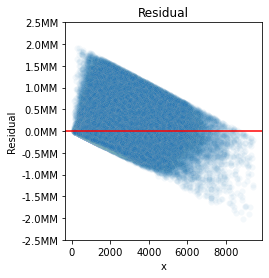

In [18]:
plot_residuals(df.x,df.y,df.yhat)

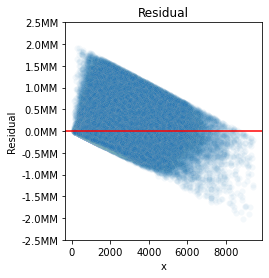

In [19]:
#test array
plot_residuals(np.array(df.x),df.y,np.array(df.yhat))

In [20]:
def regression_errors(y,yhat):
    '''
    Takes in actual and predicted values. Returns dataframe of regression performance statistics.
    
    Returns: Pandas DataFrame
    Input:
      (R)    y: actual values (pd.Series or np.array)
      (R) yhat: predicted values (pd.Series or np.array)
    
    '''
    #set index name for dataframe
    if isinstance(yhat,pd.Series): ind=yhat.name
    else: ind='yhat'
    #Create DataFrame with performance stats as columns
    df = pd.DataFrame({
        'sse': [sse(y,yhat)],
        'ess': [ess(y,yhat)],
        'tss': [tss(y,yhat)],
        'mse': [mean_squared_error(y,yhat)],
        'rmse': [rmse(y,yhat)],
        },index=[ind])
    return df


In [21]:
regression_errors(df.y,df.yhat_baseline)

,sse,ess,tss,mse,rmse
yhat_baseline,1.468970e+17,0.0,1.468970e+17,9.989616e+10,316063.530859


In [22]:
#test array
regression_errors(np.array(df.y),np.array(df.yhat_baseline)) #note index name

,sse,ess,tss,mse,rmse
yhat,1.468970e+17,0.0,1.468970e+17,9.989616e+10,316063.530859


In [38]:
def baseline_mean_errors(y):
    '''
    Takes in actual values. Returns dataframe of regression performance statistics.
    
    Returns: Pandas DataFrame
    Input:
      (R)    y: actual values (pd.Series or np.array)
    '''
    #Create series of yhat_baseline
    if isinstance(y,pd.Series): ind = y.index
    else: ind = range(len(y))
    yhat_b = pd.Series(y.mean(),index=ind)
    #Create DataFrame with performance stats as columns
    df = pd.DataFrame({
        'sse': [sse(y,yhat_b)],
        'mse': [mean_squared_error(y,yhat_b)],
        'rmse': [rmse(y,yhat_b)],
        },index=['yhat_baseline'])
    return df

In [39]:
baseline_mean_errors(df.y)

,sse,mse,rmse
yhat_baseline,1.468970e+17,9.989616e+10,316063.530859


In [40]:
baseline_mean_errors(np.array(df.y))

,sse,mse,rmse
yhat_baseline,1.468970e+17,9.989616e+10,316063.530859


# TO DO:
### Finish this function.  Needs to actual determine if the model did better.  Do we have 1 criteria we want to always use

In [26]:

# def better_than_base(y,yhat):
#     '''
#     Takes in actual and predicted values. Returns dataframe of regression performance statistics.
    
#     Returns: Pandas DataFrame
#     Input:
#       (R)    y: actual values (pd.Series or np.array)
#       (R) yhat: predicted values (pd.Series or np.array)
    
#     '''
#     df = regression_errors(y,yhat)
#     df_base = baseline_mean_errors(y)
#     df = pd.concat([df,df_base],axis=0)
#     return df
    

In [35]:
#just do the basics
def better_than_base(y,yhat):
    '''
    Takes in actual and predicted values. Returns True/False on if \
    the model performed better than the dataframe based on rmse.
    
    Returns: Boolean
    Input:
      (R)    y: actual values (pd.Series or np.array)
      (R) yhat: predicted values (pd.Series or np.array)
    
    '''
    #Determine if series or array - use info to create baseline series
    if isinstance(y,pd.Series): ind = y.index
    else: ind = range(len(y))
    yhat_b = pd.Series(y.mean(),index=ind)
    #Get RMSE for model and baseline
    rmse_base = rmse(y, yhat_b)
    rmse_mod = rmse(y,yhat)
    return rmse_mod < rmse_base
    

In [36]:
better_than_base(df.y,df.yhat)

True

In [37]:
better_than_base(np.array(df.y),np.array(df.yhat))

True